In [155]:
import pandas as pd
import numpy as np
import os
import importlib
import external_func
importlib.reload(external_func)

from external_func import *



In [ ]:
folder = 'data'
nazwy_plikow = pobierz_nazwy_plikow(folder)
print(nazwy_plikow)
pliki = {}
for nazwa_pliku in nazwy_plikow:
    wczytaj_dane(folder, nazwa_pliku, pliki)

In [2]:
klucze = [s[:-4].replace('.', '_') for s in nazwy_plikow]
klucze

['title_ratings',
 'title_principals',
 'title_akas',
 'name_basics',
 'title_basics',
 'title_episode',
 'title_crew']

In [3]:
for i in range(len(klucze)):
    print(pliki[klucze[i]].columns)

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')
Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object')
Index(['titleId', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')
Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')
Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')
Index(['tconst', 'parentTconst', 'seasonNumber', 'episodeNumber'], dtype='object')
Index(['tconst', 'directors', 'writers'], dtype='object')


# tworzenie metryki
Uznałem, ze najlepszą metryką będzie średnia harmoniczna z averageRating * log(numVotes), poniewaz srednia harmoniczna jest zawsze nizsza od sredniej arytmetycznej i dla stałej średniej arytmetyczniej osiąga maksimum gdy wszystkie oceny są równe, więc faworyzujemy niskie odchylenia. Z kolei log(numVotes), poniewaz wydaje się, ze jest to podobny poziom dla
tego samego rzędu wielkości, ale jednak faworyzuje trochę filmy popularniejsze. Np wezmy pod uwagę film ze srednią 9.1 i 100k głosów oraz film 8.9 z 130k głosów. Wówczas wg naszej metryki ocena będzie równa

In [4]:
pie = 9.1 * (np.log(100000))
dru = 8.9 * (np.log(130000))
print("Pierwszy ma ocenę ",pie, ", zaś drugi ", dru)

Pierwszy ma ocenę  104.76762173122907 , zaś drugi  104.80007859199571


Stąd widzimy, ze "ludzkim okiem" nasza metryka ma sens.

# Task 1

In [5]:
df = pliki[klucze[0]]

Dodajmy kolumnę quality, która liczy naszą metrykę dla kadego filmu

In [6]:
df['quality'] = df['averageRating'] * np.log(df['numVotes'])

In [132]:
df.head(5)

,tconst,averageRating,numVotes,quality
0,tt0000001,5.7,2063,43.501924
1,tt0000002,5.6,279,31.534786
2,tt0000003,6.5,2030,49.502642
3,tt0000004,5.4,180,28.041967
4,tt0000005,6.2,2796,49.202860


In [133]:
df2 = pliki[klucze[4]]
df2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [134]:
df3 = df.merge(df2, left_on='tconst', right_on='tconst', how='left')

In [135]:
df3['titleType'].unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [136]:
df3 = df3[df3['titleType'].isin(['movie', 'tvMovie'])]
df3.sort_values('quality', ascending=False).head(20)

,tconst,averageRating,numVotes,quality,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
83943,tt0111161,9.3,2912371,138.425646,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama
255737,tt0468569,9.0,2893597,133.902098,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama"
47432,tt0068646,9.2,2029452,133.614143,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama"
116492,tt0167260,9.0,1994127,130.551452,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama"
83726,tt0110912,8.9,2238375,130.129220,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama"
665929,tt1375666,8.8,2570529,129.884676,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi"
91757,tt0120737,8.9,2022740,129.227676,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama"
100688,tt0137523,8.8,2345337,129.077869,movie,Fight Club,Fight Club,0,1999,\N,139,Drama
82844,tt0109830,8.8,2277257,128.818643,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance"
81342,tt0108052,9.0,1462031,127.758034,movie,Schindler's List,Schindler's List,0,1993,\N,195,"Biography,Drama,History"


In [137]:
tmp = pliki[klucze[2]]
tmp_ot = tmp[tmp['isOriginalTitle'] == 1] #originaltitle
tmp2 = tmp.merge(tmp_ot, left_on='titleId', right_on='titleId', how='left')
tmp2.head(20)

,titleId,ordering_x,title_x,region_x,language_x,types_x,attributes_x,isOriginalTitle_x,ordering_y,title_y,region_y,language_y,types_y,attributes_y,isOriginalTitle_y
0,tt0000001,1,Carmencita,\N,\N,original,\N,1,1.0,Carmencita,\N,\N,original,\N,1.0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0,1.0,Carmencita,\N,\N,original,\N,1.0
2,tt0000001,3,Carmencita,US,\N,imdbDisplay,\N,0,1.0,Carmencita,\N,\N,original,\N,1.0
3,tt0000001,4,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,1.0,Carmencita,\N,\N,original,\N,1.0
4,tt0000001,5,Καρμενσίτα,GR,\N,imdbDisplay,\N,0,1.0,Carmencita,\N,\N,original,\N,1.0
5,tt0000001,6,Карменсита,RU,\N,imdbDisplay,\N,0,1.0,Carmencita,\N,\N,original,\N,1.0
6,tt0000001,7,Карменсіта,UA,\N,imdbDisplay,\N,0,1.0,Carmencita,\N,\N,original,\N,1.0
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,\N,0,1.0,Carmencita,\N,\N,original,\N,1.0
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,1.0,Le clown et ses chiens,\N,\N,original,\N,1.0
9,tt0000002,2,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0,1.0,Le clown et ses chiens,\N,\N,original,\N,1.0


In [138]:
tmp3 = tmp2[tmp2['title_x'] == tmp2['title_y']]
tmp3.info

<bound method DataFrame.info of             titleId  ordering_x                    title_x region_x  \
0         tt0000001           1                 Carmencita       \N   
1         tt0000001           2                 Carmencita       DE   
2         tt0000001           3                 Carmencita       US   
8         tt0000002           1     Le clown et ses chiens       \N   
12        tt0000002           5     Le clown et ses chiens       FR   
...             ...         ...                        ...      ...   
48887151  tt9916850           1              Episode #3.19       \N   
48887159  tt9916852           1              Episode #3.20       \N   
48887167  tt9916856           1                   The Wind       \N   
48887168  tt9916856           2                   The Wind       DE   
48887169  tt9916880           1  Horrid Henry Knows It All       \N   

         language_x      types_x   attributes_x  isOriginalTitle_x  \
0                \N     original             

In [139]:
tmp3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14795547 entries, 0 to 48887169
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   titleId            object 
 1   ordering_x         int64  
 2   title_x            object 
 3   region_x           object 
 4   language_x         object 
 5   types_x            object 
 6   attributes_x       object 
 7   isOriginalTitle_x  int64  
 8   ordering_y         float64
 9   title_y            object 
 10  region_y           object 
 11  language_y         object 
 12  types_y            object 
 13  attributes_y       object 
 14  isOriginalTitle_y  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 1.8+ GB


In [140]:
tmp4 = tmp3[tmp3['region_x'] != '\\N']
tmp4 = tmp4[['titleId', 'region_x']]
tmp4

,titleId,region_x
1,tt0000001,DE
2,tt0000001,US
12,tt0000002,FR
18,tt0000003,FR
29,tt0000004,FR
...,...,...
48886836,tt9916724,CO
48886851,tt9916754,BR
48886853,tt9916756,US
48886872,tt9916764,US


In [141]:
tmp4[tmp4['titleId'] == 'tt0000001']

,titleId,region_x
1,tt0000001,DE
2,tt0000001,US


In [142]:
df4 = df3.merge(tmp4, left_on='tconst', right_on='titleId', how='left')
df4 = df4.rename(columns={'region_x': 'region'})
df4 = df4.sort_values('quality', ascending=False)

In [143]:
# Group by 'title' and 'quality', and aggregate 'region' into a list
grouped_df = df4.groupby(['tconst', 'primaryTitle', 'quality'])['region'].agg(list).reset_index()

# Print the resulting DataFrame
#grouped_df['categorized_region'] = grouped_df['region'].apply(categorize_region)
grouped_df = grouped_df[grouped_df['region'].apply(lambda x: not any(isinstance(i, float) and np.isnan(i) for i in x))]

grouped_df

,tconst,primaryTitle,quality,region
0,tt0000009,Miss Jerry,28.925566,"[AU, HU, US]"
1,tt0000147,The Corbett-Fitzsimmons Fight,32.489823,[US]
2,tt0000502,Bohemios,12.139561,[ES]
3,tt0000574,The Story of the Kelly Gang,40.906983,"[US, SG, GB, AU]"
4,tt0000591,The Prodigal Son,17.919531,[FR]
...,...,...,...,...
366081,tt9916192,Danielle Darrieux: Il est poli d'être gai!,21.099714,[FR]
366082,tt9916270,Il talento del calabrone,42.377882,[IT]
366083,tt9916362,Coven,55.510483,"[ES, ES, AR, MX]"
366086,tt9916538,Kuambil Lagi Hatiku,18.236964,[ID]


In [144]:
grouped_df['categorized_region'] = grouped_df['region'].apply(categorize_region)
grouped_df = grouped_df.drop('region', axis=1)
grouped_df = grouped_df.rename(columns={'categorized_region': 'region'})
grouped_df


,tconst,primaryTitle,quality,region
0,tt0000009,Miss Jerry,28.925566,US
1,tt0000147,The Corbett-Fitzsimmons Fight,32.489823,US
2,tt0000502,Bohemios,12.139561,ES
3,tt0000574,The Story of the Kelly Gang,40.906983,English
4,tt0000591,The Prodigal Son,17.919531,FR
...,...,...,...,...
366081,tt9916192,Danielle Darrieux: Il est poli d'être gai!,21.099714,FR
366082,tt9916270,Il talento del calabrone,42.377882,IT
366083,tt9916362,Coven,55.510483,"AR,ES,ES,MX"
366086,tt9916538,Kuambil Lagi Hatiku,18.236964,ID


In [145]:
grouped_df = grouped_df.sort_values('quality', ascending=False)
fff = grouped_df[grouped_df['region'] != 'English']

In [146]:
fff

,tconst,primaryTitle,quality,region
69594,tt0114369,Se7en,123.935674,US
60195,tt0099685,Goodfellas,122.256999,US
44020,tt0076759,Star Wars: Episode IV - A New Hope,122.066542,"PH,SG"
31909,tt0060196,"The Good, the Bad and the Ugly",119.796589,"AE,IT"
67177,tt0110413,Léon: The Professional,119.361320,US
...,...,...,...,...
285428,tt28670576,Bolandtarin Shabe Sal,1.791759,IR
282500,tt27833215,The Doll: Creation,1.609438,PH
290700,tt30625407,Borde Sagi,1.609438,IR
116926,tt0265845,Target World,1.609438,GB


/var/folders/0r/hq8l80pd28v6wlvr518j1g700000gn/T/ipykernel_74398/2024517636.py:22: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



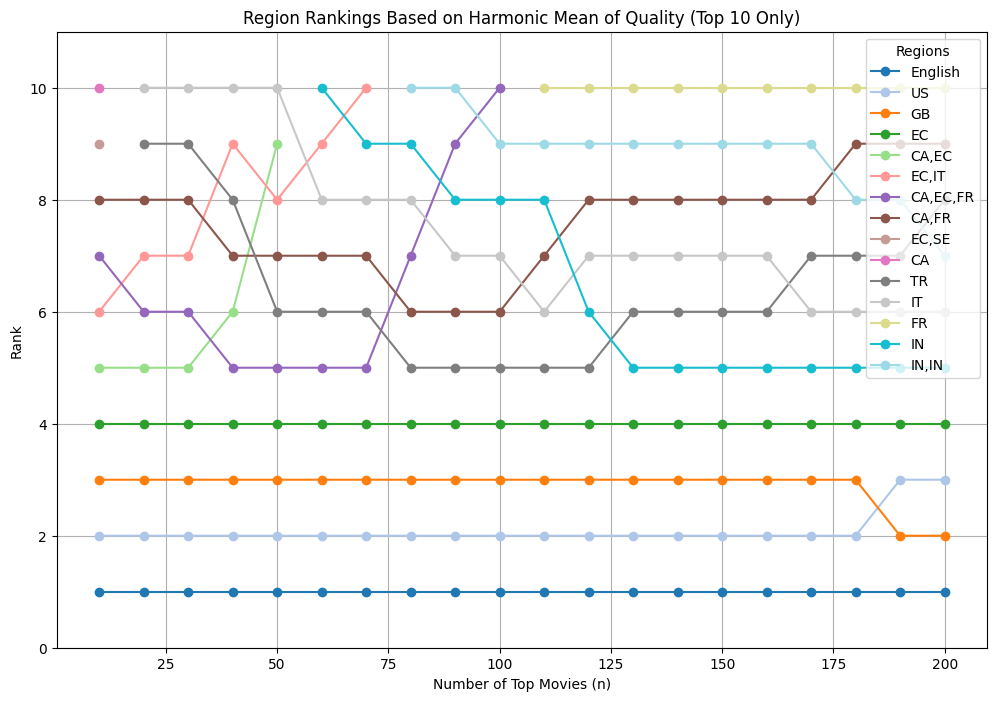

In [158]:


# Dictionary to track rankings of regions across different n values
region_rankings = {}

# Range of n values to analyze
n_values = range(10, 210, 10)
df_neg = -grouped_df
# Assuming grouped_df is your DataFrame with columns 'quality', 'region', and 'title'
# Loop over the range of n values
for n in n_values:
    top_10_quality_regions = calculate_harmonic_mean_top_n(grouped_df, n=n)

    # Track the rankings of each region
    for rank, region in enumerate(top_10_quality_regions.index, start=1):
        if region not in region_rankings:
            region_rankings[region] = []
        region_rankings[region].append((n, rank))

# Filter out regions that appear in the top 10 for any value of n
top_10_regions = {region: ranks for region, ranks in region_rankings.items() if any(rank <= 10 for _, rank in ranks)}

# Set up color map to assign unique colors to each region
color_map = plt.cm.get_cmap('tab20', len(top_10_regions))

# Plot the rankings for the top 10 regions, considering only ranks 1-10
plt.figure(figsize=(12, 8))

# Enumerate over top_10_regions to ensure each region gets a unique color
for i, (region, ranks) in enumerate(top_10_regions.items()):
    # Filter ranks to include only those from 1 to 10
    filtered_ranks = [(n, rank) for n, rank in ranks if rank <= 10]
    if filtered_ranks:
        n_vals, rank_vals = zip(*filtered_ranks)
        plt.plot(n_vals, rank_vals, marker='o', label=region, color=color_map(i))

plt.gca().invert_yaxis()  # Invert y-axis to have rank 1 at the top
plt.ylim(0, 11)  # Show only ranks 1 to 10
plt.xlabel('Number of Top Movies (n)')
plt.ylabel('Rank')
plt.title('Region Rankings Based on Harmonic Mean of Quality (Top 10 Only)')
plt.legend(title='Regions')
plt.grid(True)
plt.show()
